In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/mental_health_physical_activity.csv")
df.head()

,ID,Age,Gender,Occupation,Sleep_Hours,Daily_Steps,Exercise_Frequency,Exercise_Duration,Exercise_Type,Screen_Time_Hours,Diet_Quality,Social_Interaction,Stress_Level,Anxiety_Level,Depression_Level,Happiness_Level,Mental_Health_Score,Notes
0,1,58,Male,Student,7.7,5012,3,12.6,Cardio,7.1,5,2,10,7,1,1,-4.0,NaN
1,2,23,Male,Working Professional,6.5,1434,3,64.4,NaN,5.9,2,14,10,5,1,3,0.7,NaN
2,3,62,Female,Unemployed,5.4,4527,5,9.2,Sports,1.9,3,19,5,1,8,9,13.3,NaN
3,4,25,Female,Student,6.8,14588,5,52.0,NaN,1.6,2,9,2,4,2,7,11.3,NaN
4,5,35,Female,Unemployed,4.8,6820,3,60.3,NaN,9.4,1,19,3,9,4,3,0.7,NaN


In [2]:
# (a) Positive contributor normalization
def normalize_positive(x):
    return np.clip((x - x.min()) / (x.max() - x.min()), 0, 1)

# (b) Negative contributor normalization
def normalize_negative(x):
    return np.clip(1 - (x - x.min()) / (x.max() - x.min()), 0, 1)

# (c) Special case: Sleep function (piecewise)
def normalize_sleep(x):
    if x < 4 or x > 12:
        return 0
    elif 4 <= x < 7:
        return (x - 4) / 3
    elif 7 <= x <= 9:
        return 1
    elif 9 < x <= 12:
        return 1 - (x - 9) / 3


In [3]:
df_norm = pd.DataFrame()

# Positive contributors
df_norm["Sleep_Hours"] = df["Sleep_Hours"].apply(normalize_sleep)
df_norm["Daily_Steps"] = normalize_positive(df["Daily_Steps"])
df_norm["Exercise_Frequency"] = normalize_positive(df["Exercise_Frequency"])
df_norm["Exercise_Duration"] = normalize_positive(df["Exercise_Duration"])
df_norm["Diet_Quality"] = normalize_positive(df["Diet_Quality"])
df_norm["Social_Interaction"] = normalize_positive(df["Social_Interaction"])
df_norm["Happiness_Level"] = normalize_positive(df["Happiness_Level"])

# Negative contributors
df_norm["Screen_Time_Hours"] = normalize_negative(df["Screen_Time_Hours"])
df_norm["Stress_Level"] = normalize_negative(df["Stress_Level"])
df_norm["Anxiety_Level"] = normalize_negative(df["Anxiety_Level"])
df_norm["Depression_Level"] = normalize_negative(df["Depression_Level"])

df_norm.head()


,Sleep_Hours,Daily_Steps,Exercise_Frequency,Exercise_Duration,Diet_Quality,Social_Interaction,Happiness_Level,Screen_Time_Hours,Stress_Level,Anxiety_Level,Depression_Level
0,1.000000,0.286381,0.428571,0.140625,1.00,0.10,0.000000,0.322222,0.000000,0.333333,1.000000
1,0.833333,0.029378,0.428571,0.718750,0.25,0.70,0.222222,0.455556,0.000000,0.555556,1.000000
2,0.466667,0.251544,0.714286,0.102679,0.50,0.95,0.888889,0.900000,0.555556,1.000000,0.222222
3,0.933333,0.974213,0.714286,0.580357,0.25,0.45,0.666667,0.933333,0.888889,0.666667,0.888889
4,0.266667,0.416248,0.428571,0.672991,0.00,0.95,0.222222,0.066667,0.777778,0.111111,0.666667


In [4]:
# Equal weighting scheme
weights = {
    "Sleep_Hours": 0.1,
    "Daily_Steps": 0.1,
    "Exercise_Frequency": 0.1,
    "Exercise_Duration": 0.1,
    "Diet_Quality": 0.1,
    "Social_Interaction": 0.1,
    "Happiness_Level": 0.1,
    "Screen_Time_Hours": 0.1,
    "Stress_Level": 0.1,
    "Anxiety_Level": 0.05,
    "Depression_Level": 0.05
}

# Ensure total weight = 1
sum(weights.values())


1.0

In [5]:
# Compute weighted sum
df_norm["score_norm"] = sum(df_norm[col] * weights[col] for col in weights.keys())

# Map to 0–100 range
df_norm["MHS"] = 100 * df_norm["score_norm"]

df_norm[["score_norm", "MHS"]].head()


,score_norm,MHS
0,0.394447,39.444666
1,0.441559,44.155883
2,0.594073,59.407308
3,0.716886,71.688563
4,0.419003,41.900324


In [6]:
df["Computed_MHS"] = df_norm["MHS"]
df.to_csv("mental_health_with_computed_score.csv", index=False)
df[["Mental_Health_Score", "Computed_MHS"]].head(10)


,Mental_Health_Score,Computed_MHS
0,-4.0,39.444666
1,0.7,44.155883
2,13.3,59.407308
3,11.3,71.688563
4,0.7,41.900324
5,3.3,55.229558
6,2.7,51.645608
7,11.3,52.745539
8,5.7,55.680844
9,0.0,48.292629


In [7]:
# Cell 5: Feature selection and target
# Adjust these column names to match your dataset.
# Example assumptions for MindBalance dataset:
# Numerical: Age, Sleep_Hours, Daily_Steps, Exercise_Frequency, Exercise_Duration, Screen_Time_Hours,
# Diet_Quality, Social_Interaction, Stress_Level, Anxiety_Level, Depression_Level, Happiness_Level
# Categorical: Gender, Occupation, Exercise_Type
# Target: Mental_Health_Score (0-100)
NUM_COLS = [
    "Age", "Sleep_Hours", "Daily_Steps", "Exercise_Frequency", "Exercise_Duration",
    "Screen_Time_Hours", "Diet_Quality", "Social_Interaction",
    "Stress_Level", "Anxiety_Level", "Depression_Level", "Happiness_Level"
]
CAT_COLS = ["Gender", "Occupation", "Exercise_Type"]
TARGET = "Mental_Health_Score"

# Validate
if 'df' in globals():
    missing_cols = [c for c in NUM_COLS + CAT_COLS + [TARGET] if c not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in dataset: {missing_cols}")
    X = df[NUM_COLS + CAT_COLS].copy()
    y = df[TARGET].copy()
    print("X shape:", X.shape, "y shape:", y.shape)


X shape: (300, 15) y shape: (300,)


In [9]:
# Cell 6: Train/test split
from sklearn.model_selection import train_test_split

if 'X' in globals():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (240, 15) Test: (60, 15)


In [11]:
# Cell 7: Preprocessing pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, NUM_COLS),
    ("cat", cat_pipeline, CAT_COLS)
], verbose_feature_names_out=False)

In [13]:
# Cell 8: Model pipeline and baseline fit
from sklearn.ensemble import RandomForestRegressor

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

if 'X_train' in globals():
    model.fit(X_train, y_train)
    print("Model trained.")

Model trained.


In [15]:
# Cell 9: Evaluation
from sklearn.metrics import mean_squared_error, r2_score

if 'X_test' in globals():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    print(f"Test RMSE: {rmse:.3f}")
    print(f"Test R2: {r2:.3f}")

Test RMSE: 1.238
Test R2: 0.950


In [17]:
# Cell 11: Save pipeline (so Streamlit app can load it)
import joblib

OUTPUT_MODEL = "mindbalance_model.pkl"
joblib.dump(model, OUTPUT_MODEL)
print(f"Saved pipeline to {OUTPUT_MODEL}")

Saved pipeline to mindbalance_model.pkl


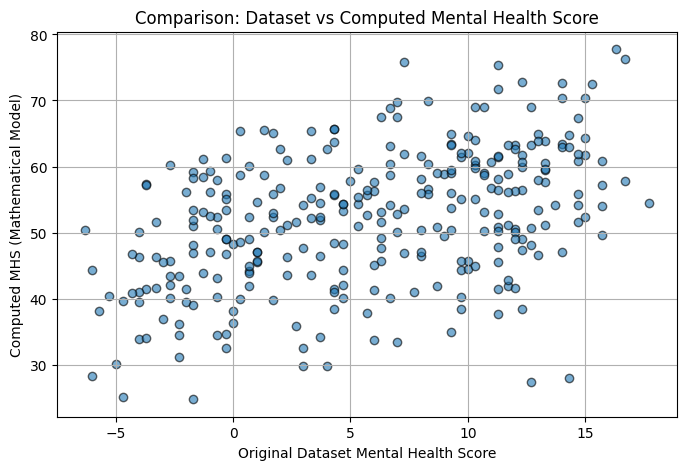

In [19]:
import matplotlib.pyplot as plt

# Compare existing dataset score vs. computed mathematical model score
plt.figure(figsize=(8, 5))
plt.scatter(df["Mental_Health_Score"], df["Computed_MHS"], alpha=0.6, edgecolors='k')
plt.xlabel("Original Dataset Mental Health Score")
plt.ylabel("Computed MHS (Mathematical Model)")
plt.title("Comparison: Dataset vs Computed Mental Health Score")
plt.grid(True)
plt.show()


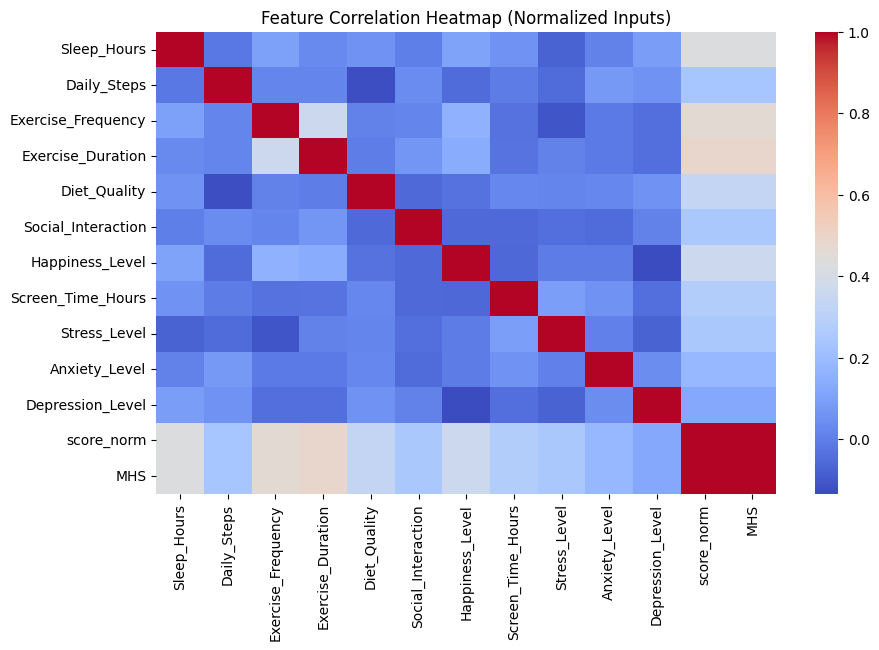

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_norm.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap (Normalized Inputs)")
plt.show()


In [21]:
top_10 = df.nlargest(10, "Computed_MHS")[["ID", "Computed_MHS", "Sleep_Hours", "Stress_Level", "Happiness_Level"]]
bottom_10 = df.nsmallest(10, "Computed_MHS")[["ID", "Computed_MHS", "Sleep_Hours", "Stress_Level", "Happiness_Level"]]

print("🏆 Top 10 Highest Mental Health Scores:")
display(top_10)

print("\n⚠️ Bottom 10 Lowest Mental Health Scores:")
display(bottom_10)


🏆 Top 10 Highest Mental Health Scores:


,ID,Computed_MHS,Sleep_Hours,Stress_Level,Happiness_Level
44,45,77.764570,6.9,4,10
296,297,76.223254,8.6,1,10
80,81,75.813752,7.4,2,7
232,233,75.312682,7.1,1,7
286,287,72.865378,8.0,6,8
61,62,72.661207,5.6,7,9
74,75,72.454767,8.6,6,10
3,4,71.688563,6.8,2,7
40,41,70.433754,5.7,1,10
121,122,70.415450,7.3,8,10



⚠️ Bottom 10 Lowest Mental Health Scores:


,ID,Computed_MHS,Sleep_Hours,Stress_Level,Happiness_Level
229,230,24.754526,4.5,4,2
29,30,25.105876,4.9,7,2
82,83,27.422537,4.5,10,9
244,245,27.953439,4.1,9,10
162,163,28.275639,6.1,7,1
177,178,29.718527,6.5,10,7
15,16,29.755439,6.1,7,4
273,274,30.072316,4.6,10,1
294,295,31.192286,4.1,5,1
216,217,32.551637,5.6,10,5


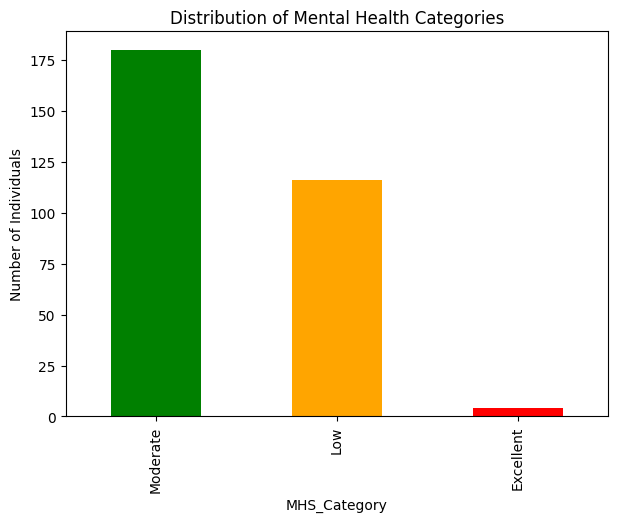

In [22]:
def categorize_mhs(score):
    if score >= 75:
        return "Excellent"
    elif score >= 50:
        return "Moderate"
    else:
        return "Low"

df["MHS_Category"] = df["Computed_MHS"].apply(categorize_mhs)

# Distribution plot
plt.figure(figsize=(7, 5))
df["MHS_Category"].value_counts().plot(kind="bar", color=["green", "orange", "red"])
plt.title("Distribution of Mental Health Categories")
plt.ylabel("Number of Individuals")
plt.show()


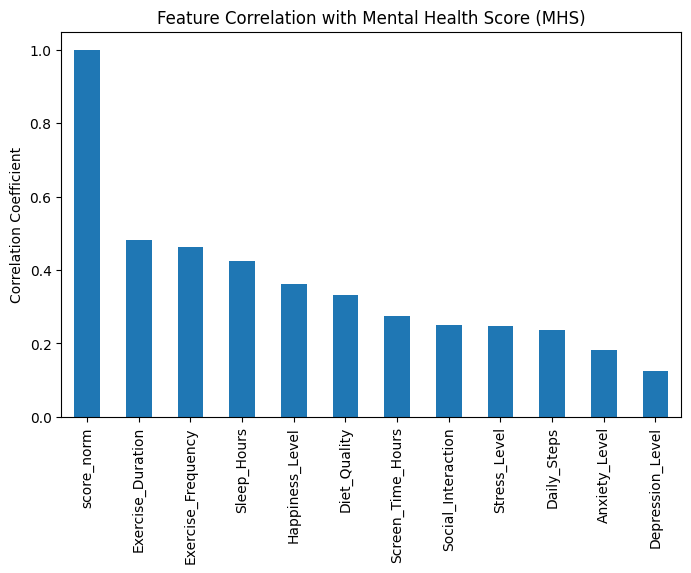

In [23]:
# Rank input features by correlation with computed MHS
feature_importance = df_norm.corr()["MHS"].sort_values(ascending=False)
feature_importance = feature_importance.drop("MHS")

plt.figure(figsize=(8, 5))
feature_importance.plot(kind="bar")
plt.title("Feature Correlation with Mental Health Score (MHS)")
plt.ylabel("Correlation Coefficient")
plt.show()


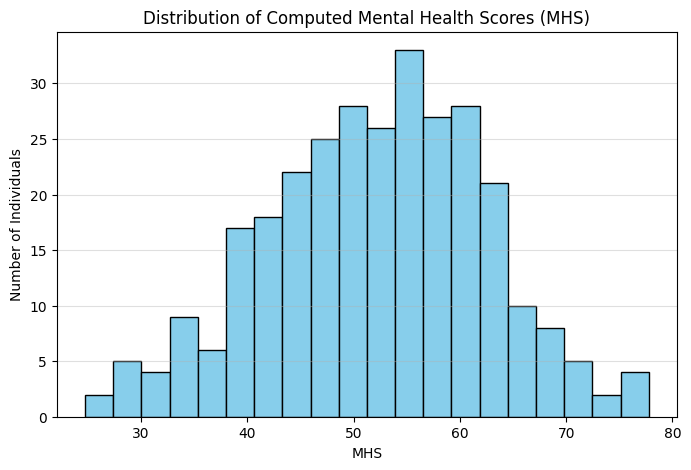

In [30]:
plt.figure(figsize=(8,5))
plt.hist(df["Computed_MHS"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Computed Mental Health Scores (MHS)")
plt.xlabel("MHS")
plt.ylabel("Number of Individuals")
plt.grid(axis='y', alpha=0.4)
plt.show()


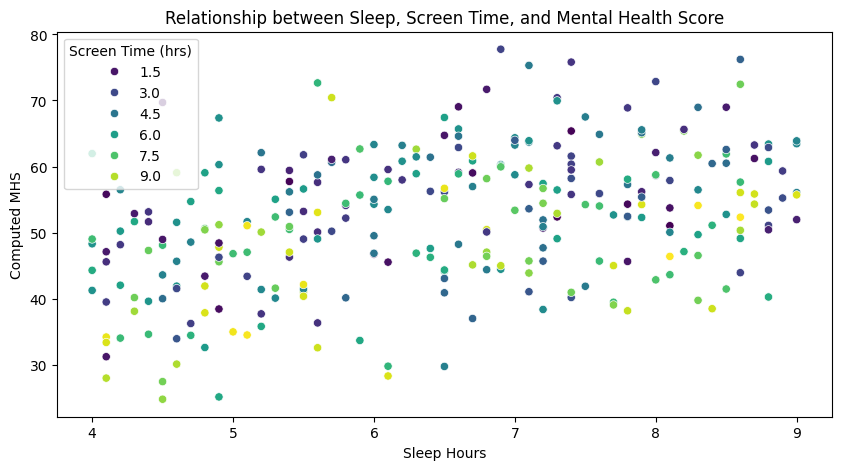

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Sleep_Hours", y="Computed_MHS", data=df, hue="Screen_Time_Hours", palette="viridis")
plt.title("Relationship between Sleep, Screen Time, and Mental Health Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Computed MHS")
plt.legend(title="Screen Time (hrs)")
plt.show()


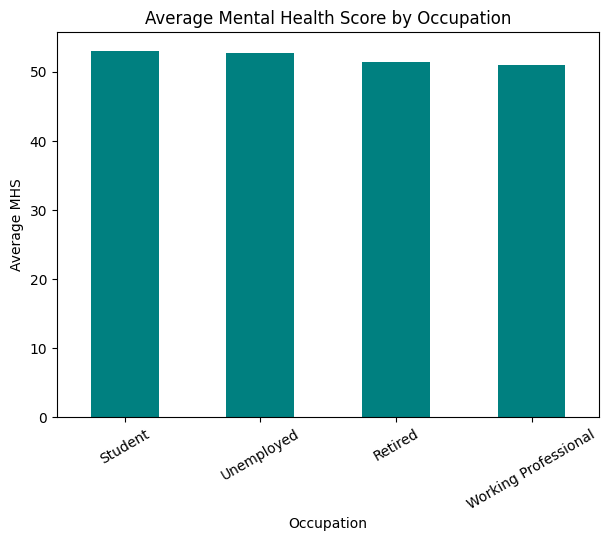

In [32]:
avg_occ = df.groupby("Occupation")["Computed_MHS"].mean().sort_values(ascending=False)
plt.figure(figsize=(7,5))
avg_occ.plot(kind="bar", color="teal")
plt.title("Average Mental Health Score by Occupation")
plt.ylabel("Average MHS")
plt.xticks(rotation=30)
plt.show()


/tmp/ipython-input-2988078672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corrs.index, y=corrs.values, palette="coolwarm")


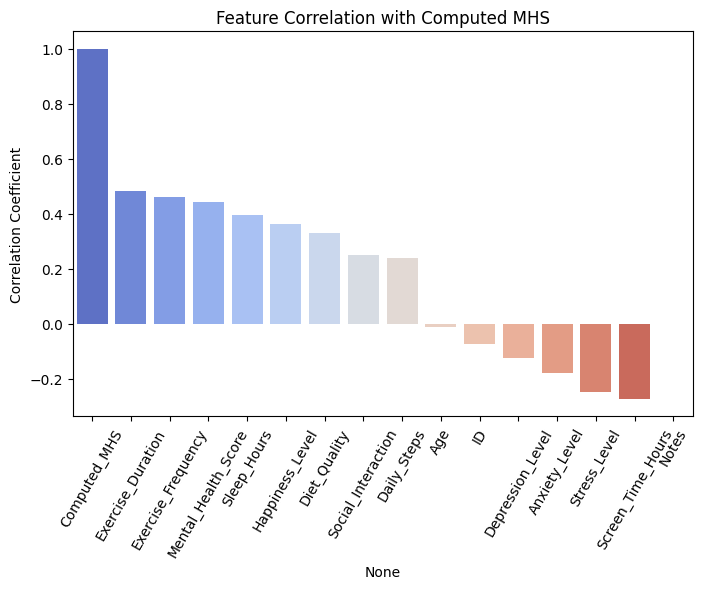

,Computed_MHS
Computed_MHS,1.000000
Exercise_Duration,0.482099
Exercise_Frequency,0.462657
Mental_Health_Score,0.444144
Sleep_Hours,0.396081
Happiness_Level,0.361386
Diet_Quality,0.331399
Social_Interaction,0.250952
Daily_Steps,0.237459
Age,-0.012870


In [33]:
corrs = df.corr(numeric_only=True)["Computed_MHS"].sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=corrs.index, y=corrs.values, palette="coolwarm")
plt.xticks(rotation=60)
plt.title("Feature Correlation with Computed MHS")
plt.ylabel("Correlation Coefficient")
plt.show()

corrs


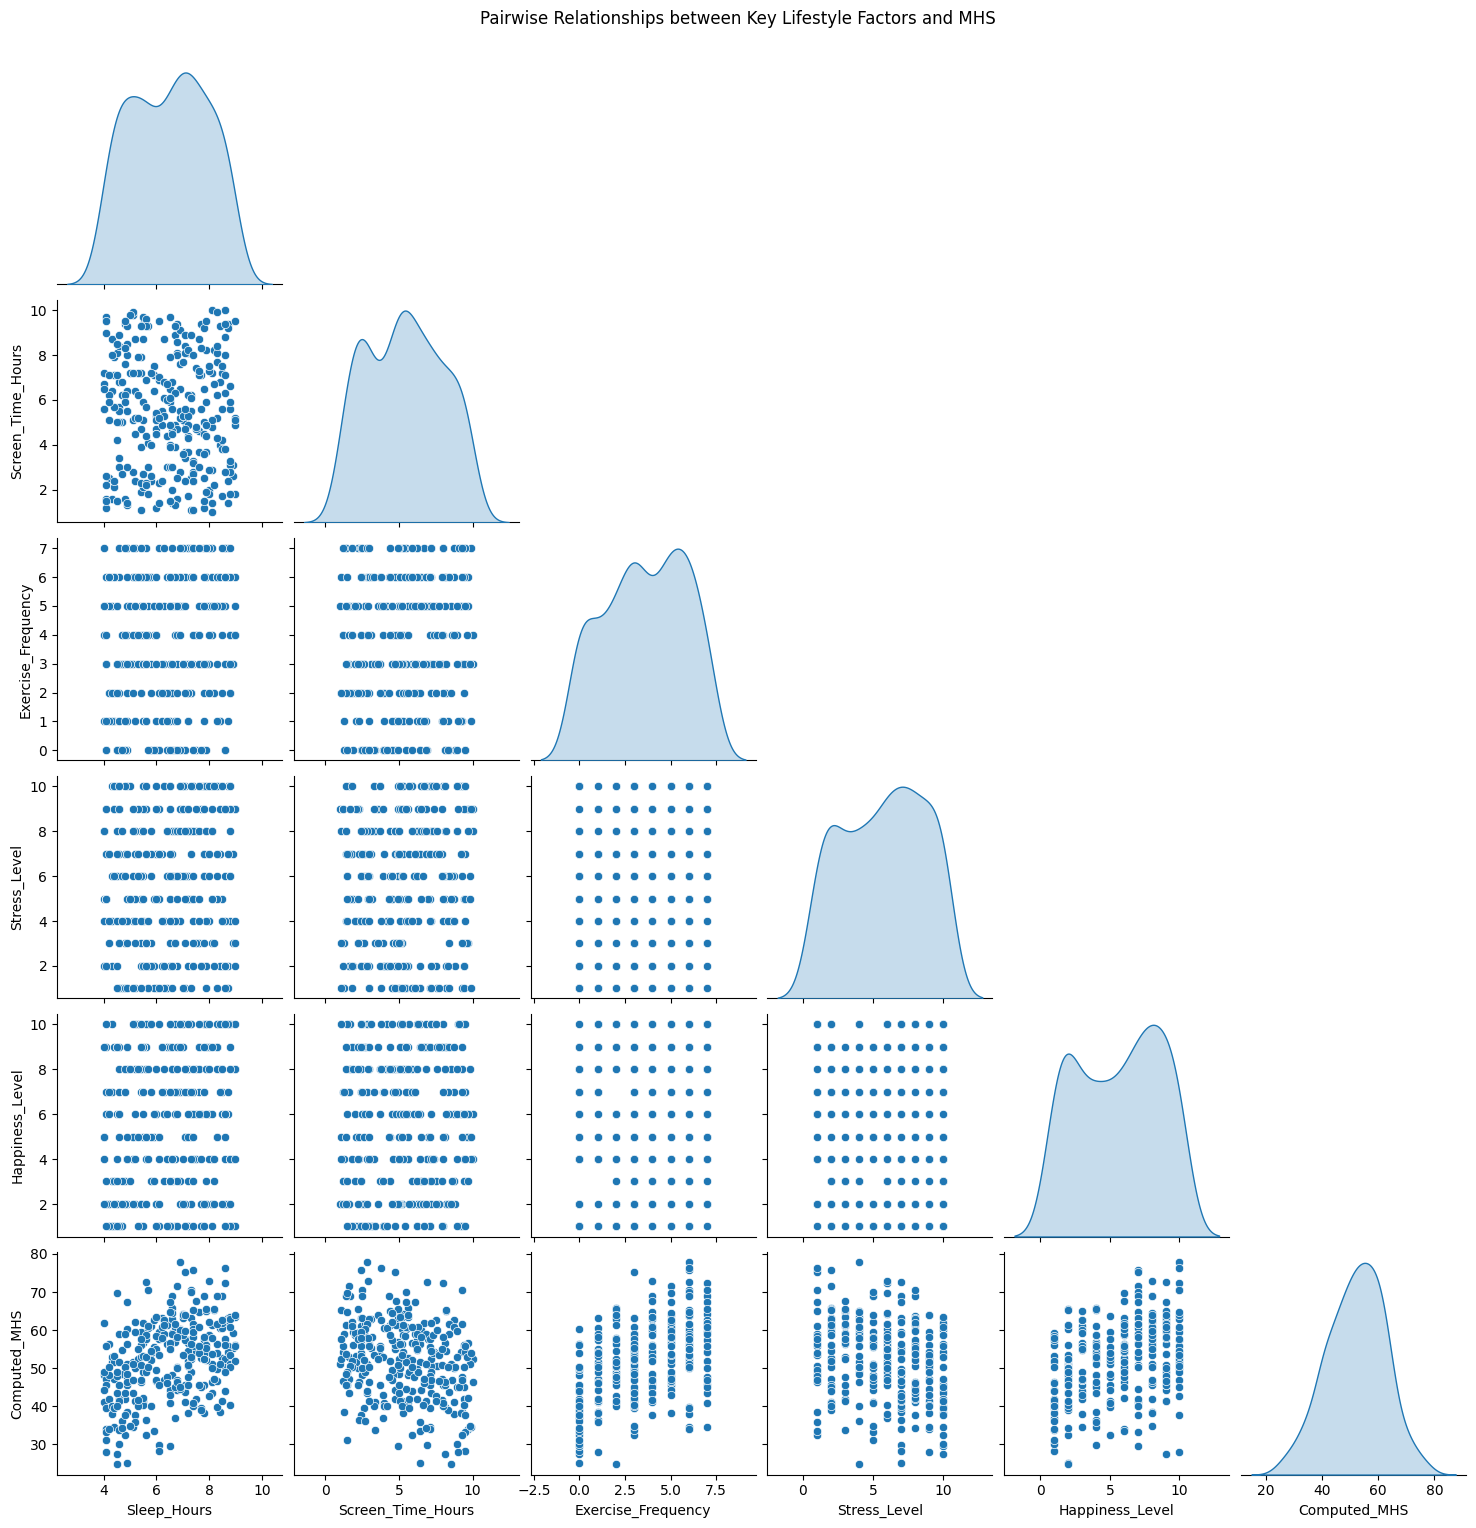

In [35]:
selected_cols = ["Sleep_Hours", "Screen_Time_Hours", "Exercise_Frequency", "Stress_Level", "Happiness_Level", "Computed_MHS"]
sns.pairplot(df[selected_cols], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships between Key Lifestyle Factors and MHS", y=1.02)
plt.show()


In [36]:
summary_stats = df.groupby("MHS_Category")[["Sleep_Hours", "Screen_Time_Hours", "Stress_Level", "Happiness_Level", "Computed_MHS"]].mean().round(2)
display(summary_stats)


,Sleep_Hours,Screen_Time_Hours,Stress_Level,Happiness_Level,Computed_MHS
MHS_Category,,,,,
Excellent,7.50,3.42,2.00,8.50,76.28
Low,5.83,6.04,6.41,4.56,41.59
Moderate,6.87,5.00,5.38,6.26,58.30


In [24]:
# Save final dataset with computed MHS and category
df.to_csv("final_mental_health_scores.csv", index=False)
print("✅ Final dataset with computed MHS saved as 'final_mental_health_scores.csv'")


✅ Final dataset with computed MHS saved as 'final_mental_health_scores.csv'


# **STREAMLIT** **IMPLEMENTATION**

In [26]:
# ======================================================
# ✅ SETUP CELL — Install Streamlit + LocalTunnel (ngrok alt)
# ======================================================
!pip install streamlit pandas joblib pyngrok --quiet

# Use LocalTunnel to create a public URL to your Streamlit app
!npm install -g localtunnel

# Make sure your app.py file is available in the Colab working dir.
# If not, upload it:
# from google.colab import files
# files.upload()  # then select app.py


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.3 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 4s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [27]:
!curl ifconfig.me

35.194.131.98

In [29]:
# ======================================================
# ✅ RUN STREAMLIT APP WITH LOCALTUNNEL
# ======================================================

import subprocess
import threading
import time

# Launch Streamlit app in background
def run_app():
    subprocess.run(["streamlit", "run", "app.py", "--server.port", "8501"])

thread = threading.Thread(target=run_app)
thread.start()

# Wait for Streamlit to start up
time.sleep(5)

# Launch localtunnel and print the public URL
!lt --port 8501 --subdomain mindbalance-demo || lt --port 8501


your url is: https://mindbalance-demo.loca.lt
^C
